#### Sachid Deshmukh
#### Data612- Assignment-3
#### 06/24/2019
###### Reference - https://nbviewer.jupyter.org/github/albertauyeung/matrix-factorization-in-python/blob/master/mf.ipynb

#### Import required libraries

In [98]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#### Create initial utility matrix 5 users and four movies

In [99]:
utilitymatrix = np.array([
    [4, 5, 2, 5],
    [3, 0, 0, 4],
    [0, 4, 4, 2],
    [3, 0, 0, 4],
    [2, 3, 3, 5],
])

features=2
nusers, nitems = utilitymatrix.shape
iterations=50
alpha=0.1
beta=0.1

#### Create user factors and item factors. Calculate global mean, userbias, itembias

In [100]:
userfactors = np.random.normal(scale=1/features, size=(nusers, features))
itemfactors = np.random.normal(scale=1/features, size=(nitems, features))
userbias = np.zeros(nusers)
itembias = np.zeros(nitems)
globalmean = np.mean(utilitymatrix[np.where(utilitymatrix != 0)])
samples = [
            (i, j, utilitymatrix[i, j])
            for i in range(nusers)
            for j in range(nitems)
            if utilitymatrix[i, j] > 0
        ]


#### Utility function to calculate MSE

In [101]:
def mse(utilitymatrix, predictedmatrix):
    xs, ys = utilitymatrix.nonzero()
    error = 0
    for x, y in zip(xs, ys):
        error += pow(utilitymatrix[x, y] - predictedmatrix[x, y], 2)
    return np.sqrt(error)

#### Stochastic gradient descent. Iterative way to calculate User factors and Item factors which minimizes MSE

In [102]:
# Perform stochastic gradient descent for number of iterations
training_process = []
for itern in range(iterations):
    np.random.shuffle(samples)
    for i, j, r in samples:
            # Computer prediction and error
            prediction = globalmean + userbias[i] + itembias[j] + userfactors[i, :].dot(itemfactors[j, :].T)
            e = (r - prediction)
            
            # Update biases
            userbias[i] += alpha * (e - beta * userbias[i])
            itembias[j] += alpha * (e - beta * itembias[j])
            
            # Create copy of row of P since we need to update it but use older values for update on Q
            userfactors_copy = userfactors[i, :][:]
            
            # Update user and item latent feature matrices
            userfactors[i, :] += alpha * (e * itemfactors[j, :] - beta * userfactors[i,:])
            itemfactors[j, :] += alpha * (e * userfactors_copy - beta * itemfactors[j,:])
    
    predictedmatrix = globalmean + userbias[:,np.newaxis] + itembias[np.newaxis:,] + userfactors.dot(itemfactors.T)
    error = mse(utilitymatrix, predictedmatrix)
    training_process.append((itern, error))
    if (itern+1) % 10 == 0:
        print("Iteration: %d ; error = %.4f" % (itern+1, error))


Iteration: 10 ; error = 1.8563
Iteration: 20 ; error = 1.0361
Iteration: 30 ; error = 0.4987
Iteration: 40 ; error = 0.4683
Iteration: 50 ; error = 0.4734


In [103]:
#Print User Factors
userfactors

array([[ 0.09086561, -1.09584468],
       [-0.13080918,  0.36017526],
       [ 0.83857566,  0.92284995],
       [-0.06678657, -0.02425626],
       [-1.12957237,  0.07554947]])

In [104]:
#print Item Factors
itemfactors

array([[ 0.55614541, -0.41280969],
       [ 0.62477988, -0.38126844],
       [ 0.0116792 ,  1.15412104],
       [-1.0083313 , -0.66110014]])

In [105]:
#print original utility matrix
utilitymatrix

array([[4, 5, 2, 5],
       [3, 0, 0, 4],
       [0, 4, 4, 2],
       [3, 0, 0, 4],
       [2, 3, 3, 5]])

In [106]:
#print predicted matrix
predictedmatrix

array([[3.92408297, 4.85616891, 2.19340859, 4.87978136],
       [3.03377598, 3.99657206, 3.70527839, 3.97476355],
       [2.88909562, 3.93617238, 3.91447301, 2.17379643],
       [3.03434624, 3.98941104, 3.06861296, 3.97062261],
       [2.21123094, 3.09649999, 2.98053727, 4.78543014]])

#### If we compare original utility matrix with calculated predicted matrix, we can see that actual known ratings are very close to predicted ratings. We can also see unknown ratigs are calculated as a function of global mean, user bias, item bias and dot product of user factors and item factors

#### If we plot MSE vs Iterations we can see that MSE decreases rapidly with no of iterations initially. Howerer after certain number of iterations there is less change in MSE

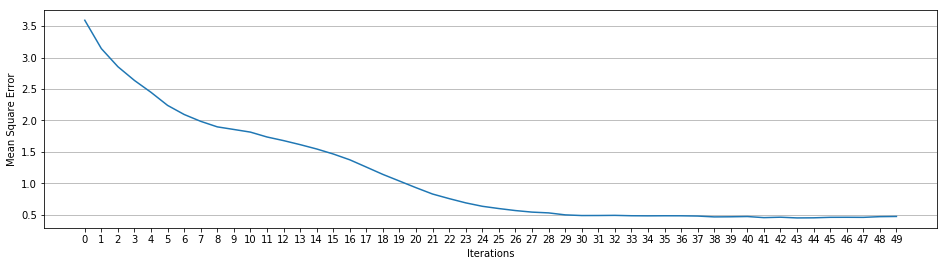

In [107]:
x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")